# Classify Cats and Dogs with Convolutional Neural Networks

Use **large dataset** to **avoid overfitting**

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

## Get the Data

(Large dataset. Takes time to download)

https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

OR

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [ ]:
# download the zipped data
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" -O "/tmp/cats-and-dogs.zip"

# unzip the data
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# check the data
train_cat_dir = os.path.join('/tmp/PetImages/Cat')
print('total training cat images:', len(os.listdir(train_cat_dir)))
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])
train_dog_dir = os.path.join('/tmp/PetImages/Dog')
print('total training dog images:', len(os.listdir(train_dog_dir)))
train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

--2020-12-31 06:25:15--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.196.32.25, 2600:1408:5400:38d::e59, 2600:1408:5400:38b::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.196.32.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  89.9MB/s    in 7.8s    

2020-12-31 06:25:23 (101 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]

total training cat images: 12501
['11777.jpg', '4950.jpg', '1297.jpg', '8163.jpg', '11191.jpg', '7960.jpg', '4149.jpg', '8528.jpg', '4954.jpg', '7042.jpg']
total training dog images: 12501
['11777.jpg', '4950.jpg', '1297.jpg', '8163.jpg', '11191.jpg', '7960.jpg', '4149.jpg', '8528.jpg', '4954.jpg', '7042.jpg']


## Prepare the Data

Separate into training and validation sets

In [ ]:
# make required directories
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

# function to split data into training and testing sets
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
 
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
 
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
 
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"
 
split_size = .9 # 90% training 10% testing
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.
11250
11250
1250
1250


## Define and Compile the Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 
model.summary()
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=RMSprop(lr=0.001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Train the Model

* Preprocess data with **ImageDataGenerator**
* Train using ***fit_generator***
* Stop training when acc>90% is using **Callback**

In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=100, class_mode='binary', target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=100, class_mode='binary', target_size=(150, 150))

class myCallback90(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so terminating training!")
      self.model.stop_training = True
callback = myCallback90()

history = model.fit_generator(train_generator, epochs=20, verbose=1, validation_data=validation_generator, callbacks=[callback])

Found 22498 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 84/225 [==========>...................] - ETA: 39s - loss: 1.8339 - accuracy: 0.5321

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 77s 310ms/step - loss: 1.2173 - accuracy: 0.5674 - val_loss: 0.5856 - val_accuracy: 0.6841
Epoch 2/20
225/225 [==============================] - 69s 307ms/step - loss: 0.5645 - accuracy: 0.7106 - val_loss: 0.4720 - val_accuracy: 0.7718
Epoch 3/20
225/225 [==============================] - 69s 305ms/step - loss: 0.4819 - accuracy: 0.7668 - val_loss: 0.3963 - val_accuracy: 0.8195
Epoch 4/20
225/225 [==============================] - 68s 304ms/step - loss: 0.4069 - accuracy: 0.8104 - val_loss: 0.3064 - val_accuracy: 0.8723
Epoch 5/20
225/225 [==============================] - 68s 304ms/step - loss: 0.3391 - accuracy: 0.8479 - val_loss: 0.3109 - val_accuracy: 0.8747
Epoch 6/20
225/225 [==============================] - 68s 304ms/step - loss: 0.2704 - accuracy: 0.8841 - val_loss: 0.3117 - val_accuracy: 0.8543
Epoch 7/20
225/225 [==============================] - 68s 303ms/step - loss: 0.2078 - accuracy: 0.9164 - val_loss: 0.1134 - val_accuracy: 0.9

## Explore the Result

* Plot Training and Validation loss and accuracy.
* Check whether there is overfitting.

<Figure size 432x288 with 0 Axes>

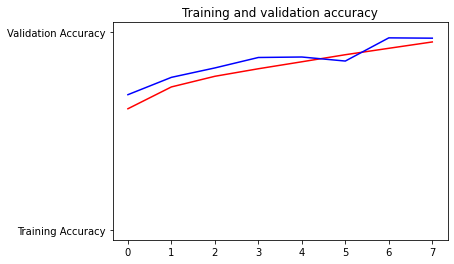

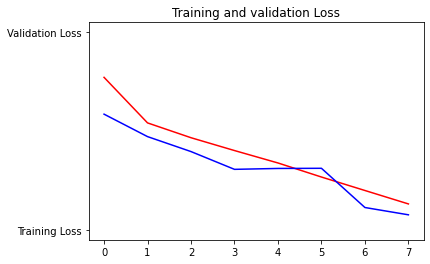

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

trn_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
trn_loss=history.history['loss']
val_loss=history.history['val_loss']
 
epochs=range(len(trn_acc)) # Get number of epochs
 
# Plot training and validation accuracy per epoch
plt.plot(epochs, trn_acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
 
# Plot training and validation loss per epoch
plt.plot(epochs, trn_loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation Loss')
plt.figure()

## Test the Model

Upload an image here from file system and have it classified.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  x_tst = np.vstack([x])
  pred = model.predict(x_tst, batch_size=10)
  if pred[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat_peeking.jpg to cat_peeking.jpg
cat_peeking.jpg is a cat
